# DIGIT RECOGNIZER USING NEURAL NETWORKS

December 4, 2017

Welcome! This IPython notebook will go through the implementation of a Feedforward Neural Network to solve the famous Handwritten Digit Recognition problem.

# 1. Introduction

## 1.1 Handwritten Character Recognition

Handwritten character recognition is the ability of a device to process input handwritten characters taken from printed physical documents or handwritten characters written from a touchscreen. The input handwritten digits are usually in the form of an image or a real-time recognition using a camera for optical scanning. The input is then fed to a pattern-recognition software for the recognition process. This technology is often used to extract characters from old printed documents for those documents to have a soft copy. In addition, handwritten character recognition is also used to recognize handwritten characters written from a touchscreen.

## 1.2 Handwritten Digits

In this paper, we deal with a subset of handwritten characters which are handwritten digits. A database of handwritten digits, called MNIST database, is used to train and test a machine learning model for handwritten character recognition. In particular, the MNIST database is used in this paper to feed the feedforward neural network for training and testing. Furthermore, according to Yann LeCun, the MNIST database currently contains $60,000$ images for training and $10,000$ images for testing. The set of images in the MNIST database is the combination of two NIST databases: Special Database 1 and Special Database 2 which are gathered from American high school students and employees of the United States Census Bureau.

Further exploration and analysis of the MNIST dataset will be discussed in the methodology chapter below.

## 1.3 Objective

The aim of this paper is to build a feedforward neural network for handwritten digit recognition using the scikit-learn machine learning library.

# 2. Methodology

## 2.1 Data and Architecture

### 2.1.1 MNIST Dataset

As discussed in the previous chapter, the MNIST database contains $60,000$ training images and $10,000$ testing images. Each image contains features denoted as $X$ and target denoted as $y$.

Input $X$ is a matrix with a column size of $784$ and a row size depending on the number of images being fed to the feedforward neural net. Each row vector corresponds to each image of the MNIST data. An MNIST image, with $28x28$ pixel size, is flattened into a vector of $784$ pixels, where each pixel value has the range of $[0, 255]$, with $0$ being the hex color of $0x00$ and $255$ being the hex color of $0xFF$. As suggested by Ian Goodfellow, it is generally preferable to scale the pixel values to the range $[0, 1]$ for wider options of loss functions. Below is a collection of MNIST digits of the number $2$.

<img height="250" width="250" src="https://www.researchgate.net/profile/Guy_Mayraz/publication/2540340/figure/fig1/AS:279612820082697@1443676299495/Fig-2-Examples-of-2s-in-the-MNIST-database-first-100-examples-Note-the-very-diverse.png">

Similar to the input, target $y$ is a matrix where the row vectors of size $10$ are in a one-hot vector format. The one-hot vector format is a vector encoding where the vector is all-zero apart from one element. The index of the nonzero element dictates the category of the MNIST image. Each row vector corresponds to each of the MNIST examples.

*e.g.* An MNIST image containing the number $2$ has a target $y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$. An MNIST image containing the number $9$ has a target $y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$.

### 2.1.2 Architecture of the Neural Network

The feedforward neural network (ANN) contains an input layer, $3$ hidden layers, and an output layer. The input layer has $784$ nodes, where each of the nodes corresponds to the pixel of an image. Preferably, the number of nodes in the hidden layer is between the number of nodes in the input layer and the number of nodes in the output layer. In our case, we chose an arbitrary number of $600$ nodes for the first hidden layer and 500 nodes for the rest of the hidden layers. Lastly, the output layer contains $10$ nodes corresponding to the one-hot vector format. The graph of the feedforward neural network is shown in the figure below.

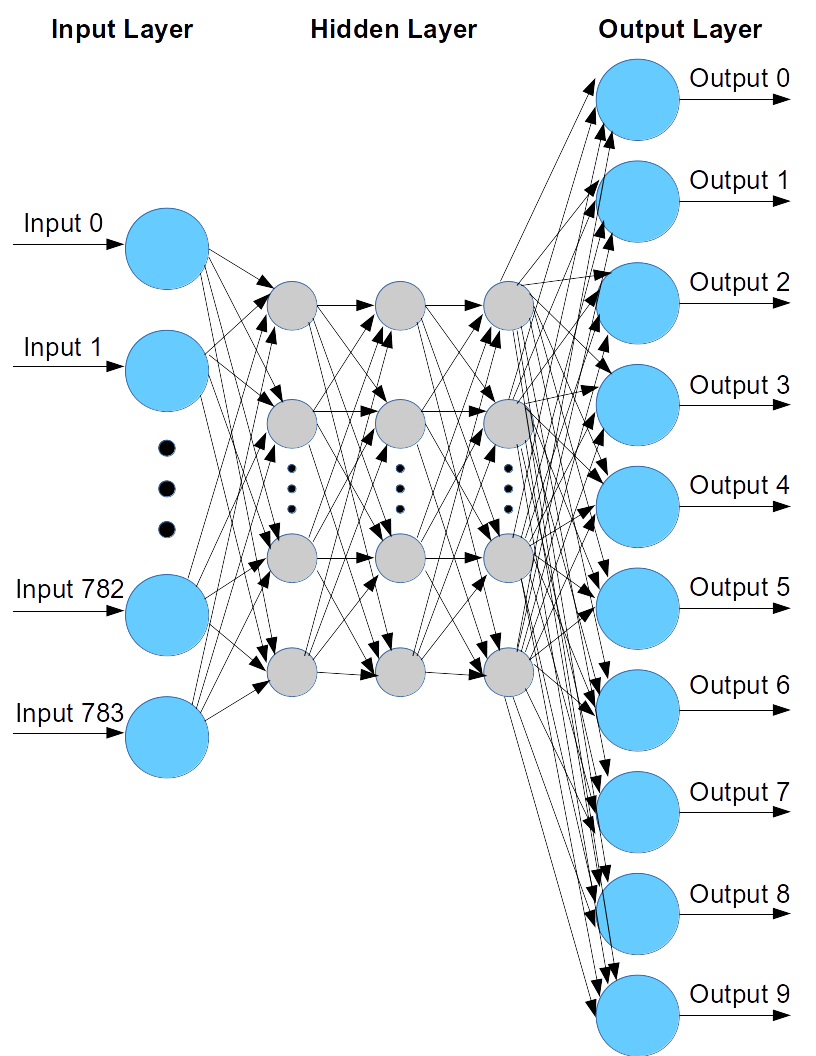

Ideally, the output layer must be in a one-hot vector format where the layer’s nodes are all zero apart from one node. However, after the first forward propagation, it is expected that the output of the ANN is inaccurate. This is the reason we train the ANN for its output to be as accurate as possible. The details and implementation of the training will be further discussed in the following sections.

## 2.2 Python Implementation

The feedforward neural network was implemented in scikit-learn, a machine learning library. The MNIST dataset was first retrieved from the scikit-learn collection of datasets.

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

<br />The dataset was then separated into a training set containing $60,000$ handwritten images, and an encoded testing set containing $10,000$ handwritten images. We followed the number of training and testing data split of the original MNIST dataset since this was the best possible split of the MNIST dataset. We also further randomized the training and testing split. The training set contained the input $X_{train}$ and target $y_{train}$. The testing set also contained the input $X_{test}$ and target $y_{test}$. Moreover, since the original MNIST dataset input has pixel values of $0$ to $255$, we rescaled the input to make the input pixel values range from $0$ through $1$.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Separate the dataset into training and testing
X, y = mnist.data / 255., mnist.target
X_train, X_test, y_train_un, y_test_un = train_test_split(X, y, 
                                                       test_size=0.14285, 
                                                       random_state=42)

# Encode target y
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train_un.reshape(-1,1), y=None).toarray()
y_test = enc.fit_transform(y_test_un.reshape(-1,1), y=None).toarray()

<br />The ANN was then built using the built-in neural network model: MLPClassifier. The following parameters were used to configure the ANN. The solver we used for backpropagation was the *'sgd'* or stochastic gradient descent. The activation function we used was *‘relu’*, known as the rectified linear unit. Moreover, we chose $3$ hidden layers, one with $600$ neurons and the rest with $500$ neurons. Lastly, the maximum number of epochs or iterations for training was set to $100$. The maximum number of epochs of $100$ was chosen so that the ANN converges to a near-zero or zero error rate while not prolonging the training time. The learning rate was also chosen to be $0.1$. The other parameters were not adjusted and were left to its default setting.

In [3]:
from sklearn.neural_network import MLPClassifier

# Build the feedforward neural network
mlp = MLPClassifier(hidden_layer_sizes=(600,500,500), activation='relu', max_iter=100, 
                    alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, 
                    learning_rate_init=0.1)

<br />Lastly, the ANN was then trained using the scikit-learn fit method. The ANN was trained using the $X_{train}$ and target $y_{train}$. The execution time was also measured for further analysis.

In [4]:
import time

# Train the feedforward neural network
start = time.time()
mlp.fit(X_train, y_train)
end = time.time()

Iteration 1, loss = 0.51711101
Iteration 2, loss = 0.15635187
Iteration 3, loss = 0.10373483
Iteration 4, loss = 0.07495304
Iteration 5, loss = 0.05768942
Iteration 6, loss = 0.05298957
Iteration 7, loss = 0.03868064
Iteration 8, loss = 0.03264720
Iteration 9, loss = 0.02607770
Iteration 10, loss = 0.02567883
Iteration 11, loss = 0.01968951
Iteration 12, loss = 0.02287950
Iteration 13, loss = 0.01499231
Iteration 14, loss = 0.01352897
Iteration 15, loss = 0.01008935
Iteration 16, loss = 0.00937877
Iteration 17, loss = 0.01368178
Iteration 18, loss = 0.00681162
Iteration 19, loss = 0.00862986
Iteration 20, loss = 0.00947478
Iteration 21, loss = 0.00602236
Iteration 22, loss = 0.00145661
Iteration 23, loss = 0.00105749
Iteration 24, loss = 0.00094647
Iteration 25, loss = 0.00090825
Iteration 26, loss = 0.00089673
Iteration 27, loss = 0.00088852
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


# 3. Data and Analysis

The $10,000$ testing images were fed into our feedforward neural network to assess its performance. The images contain about $5,000$ images taken from the original NIST test set, which makes it more difficult to recognize. Clearly, the predictions of the model are used to assess its performance as shown in the latter part of this chapter. The distribution of the testing images is shown in the figure below.

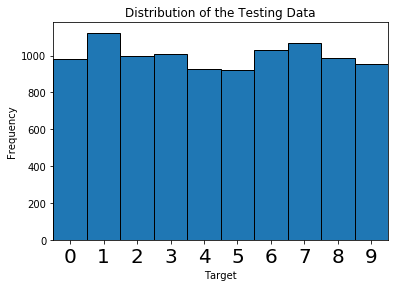

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
bins = range(11)
plt.hist(y_test_un, bins=bins, edgecolor='black')
bins_labels(bins, fontsize=20)

plt.title("Distribution of the Testing Data")
plt.xlabel("Target")
plt.ylabel("Frequency")

plt.show()

## 3.1 Accuracy Score

Accuracy is used to describe the closeness of a measurement to the true value. To evaluate the ANN, we used the accuracy score between the target value and the output of our model. The accuracy score is computed using scikit-learn’s built-in function accuracy. This function takes in two parameters: the target $y$ and the model output $\hat{y}$. The function accuracy uses an indicator function $1(y=\hat{y})$ to check whether the $y_i$ and $\hat{y}_i$ are equal. The indicator function outputs $1$ if they are equal, otherwise, it outputs $0$. It then gets the summation of the outputs of every $y_i$ and $\hat{y}_i$ pair and normalizes it by dividing by the number of images fed. The accuracy formula is shown below.


$$accuracy\left(y,\:\hat{y}\right)\:=\:\frac{1}{n_{samples}}\sum _{i=0}^{n_{samples}}1\left(y_i=\hat{y}_i\right)\:$$

After the training process, the ANN was tested using the scikit-learn score method. The ANN was tested for its accuracy score for both the training datasets and testing datasets.

In [6]:
# Measure the training and testing accuracy scores
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print("Execution time: %f" % (end - start))

Training set score: 1.000000
Test set score: 0.983200
Execution time: 535.214162


As illustrated above, the accuracy score of our model using the training data is $100\%$. The error of the model converges to $0\%$ on the training data. This is expected since the model is trained to familiarize itself with the training data thus having more accurate predictions on it. On the other hand, the model still performed exceptionally well using the testing data having a score of $98.32\%$ in which the error converges to $1.68\%$.

In addition, the training time took 535.214162 seconds or approximately 8.9 minutes on a 2.6 GHz Intel Core i5 machine. 

To put our model’s performance into context, we compare the results of five different feedforward neural networks used for digit recognition using the same MNIST dataset. There are four different feedforward neural networks created by LeCun in his 1998 paper about gradient-based learning for document recognition. We also used Hinton’s feedforward neural network as a point of comparison for our own model. This is illustrated in the table below, and the data was retreived from http://yann.lecun.com/exdb/mnist/.

|Model | Hidden Layers | Hidden Units | Accuracy Score
| :-: | :-: | :-: | :-: |
| Our Model | $$3$$ | $$600, 500, 500$$ | $$98.32\%$$ |
| LeCun et al. | $$1$$ | $$300$$ | $$95.3\%$$ |
| LeCun et al. | $$1$$ | $$1000$$ | $$95.5\%$$ |
| LeCun et al. | $$2$$ | $$300, 100$$ | $$96.95\%$$ |
| LeCun et al. | $$2$$ | $$500, 150$$ | $$97.05\%$$ |
| Hinton | $$5$$ | $$2500, 2000, 1500, 1000, 500$$ | $$99.65%$$ |

## 3.2 Confusion Matrix

The accuracy of the ANN was also evaluated using the confusion matrix. A confusion matrix is a statistical table layout that allows the visualization and evaluation of a machine learning model. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class. The entry $(i, j)$ means that a certain input is in the actual classification $i$ but is predicted by the model to be in group $j$.

Below is a method for both plotting a confusion matrix and decoding the one-hot vector format. The decoding only converts a one-hot vector back into its original integer representation.

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def decode(data):
    data_new = np.array(data)
    return np.argmax(data_new, axis=1)

<br />As seen below, we run the model predictions once again and store it inside $y_{pred}$. We then compute the confusion matrix for our model's evaluation.

In [8]:
# Run model predictions on testing set
y_pred = mlp.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_un, decode(y_pred))
np.set_printoptions(precision=2)

<br />As illustrated below, we can see the values corresponding to the number of images identified. For instance, the value 974 in entry (0,0) means that 974 testing images was correctly classified by the model as digit 0. Moreover, we can observe that the model struggles with the digit $8$ by misclassifying it as digit $0$ for $7$ testing images. The model also struggles with digit $9$, misclassifying it as digit $4$ for $7$ testing images.  

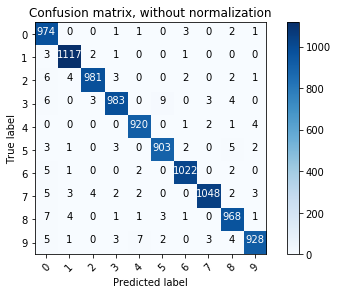

In [9]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')
plt.show()

Furthermore, as illustrated below, we can see the percentage of accuracy of the model for digits 0 through 9. The figure shows that the ANN is most accurate when recognizing digits $6$, $4$, $1$, and $0$ with $99\%$ accuracy. The model, however, struggled with digit $9$ with a $3\%$ error rate.

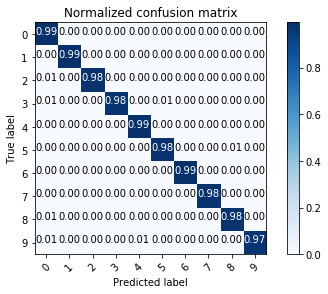

In [10]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# 4. Conclusion

As shown in the previous sections, our model shows highly desirable results in recognizing handwritten digits with a computed accuracy of $98.32\%$ on the test set of the MNIST database with a relatively short training time.

During testing, however, the results show that our model struggles to distinguish the numbers $3$ with $5$, $9$ with $4$, as well as $2$, $3$, and $8$ with $0$. This may be due to the groups of numbers having a similar shape or having common strokes.

In conclusion, the use of $3$ hidden layers with sizes $600$, $500$, $500$ proves to be an effective architecture for the multilayered perceptron to correctly classify handwritten digits according to which number from $0$ to $9$ they represent.

# 5. Individual Contributions

### Mandanas, Adel Ismael
-  Project Proposal
-  Introduction
-  Methodology
-  Data and Analysis

### Supelana, Ryan Chester
-  Project Proposal
-  Introduction
-  Conclusion
-  Slides for Presentation